# About Dataset

**Internet Service Provider Customer Churn**

**Context** :
There is a big competition between Internet providers. If a providers want to increase its revenue they needs more subscriber but keep existing customer is more important than having new ones. So providers want to know which customer should cancel his service. we call this as churn. if the know who will go, maybe they can catch them with promotions.

**Features**

* **customerID** :
unique customer id

* **gender** :
the gender of the customer, male/female

* **SeniorCitizen** :
senior citizen = 1, no = 0

* **Partner** :
has a partner or not (yes/no)

* **Dependents** :
Whether the customer has dependents or not (Yes, No)

* **Tenure** :
Number of months the customer has stayed with the company

* **PhoneService** :
Whether the customer has a phone service or not (Yes, No)

* **MultipleLines** :
Whether the customer has multiple lines or not (Yes, No, No phone service)

* **InternetService** :
Customer’s internet service provider (DSL, Fiber optic, No)

* **OnlineSecurity** :
Whether the customer has online security or not (Yes, No, No internet service)

* **OnlineBackup** :
Whether the customer has online security or not (Yes, No, No internet service)

* **DeviceProtection** :
Whether the customer has online security or not (Yes, No, No internet service)

* **TechSupport** :
Whether the customer has online security or not (Yes, No, No internet service)

* **StreamingTV** :
Whether the customer has online security or not (Yes, No, No internet service)

* **StreamingMovies** :
Whether the customer has online security or not (Yes, No, No internet service)

* **Contract** :
type of contract provider, month-to-month, one year, two year

* **Payment Method** :
type of payment method

* **MonthlyCharges** :
total charges for using the provider per month

* **TotalCharges** :
The total charges for using the provider

* **churn** :
this is the target column. if 1 customer canceled his service

#Import Library

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Preprocessing Data

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# change directory
%cd /content/gdrive/MyDrive/Stupen

/content/gdrive/MyDrive/Stupen


In [ ]:
# load csv file using pandas
df = pd.read_csv('data_tugas1.csv')

# data shape (row, columns)
df.shape

(7043, 21)

In [ ]:
# show first-5 data
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
# show information about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
#mengecek apakah ada data yang duplikat
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 21)


In [ ]:
# show descriptive statistic
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [ ]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [ ]:
# Convert 'TotalCharges' to float, handling errors with 'coerce'
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Check the data type after conversion
print(df['TotalCharges'].dtype)

float64


In [ ]:
# count missing values each row
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [ ]:
# Optionally, preview a few rows with null values
null_values = df[df['TotalCharges'].isnull()]
print(null_values.head())  # Display the first few rows with null values

      customerID  gender  SeniorCitizen Partner Dependents  tenure  \
488   4472-LVYGI  Female              0     Yes        Yes       0   
753   3115-CZMZD    Male              0      No        Yes       0   
936   5709-LVOEQ  Female              0     Yes        Yes       0   
1082  4367-NUYAO    Male              0     Yes        Yes       0   
1340  1371-DWPAZ  Female              0     Yes        Yes       0   

     PhoneService     MultipleLines InternetService       OnlineSecurity  ...  \
488            No  No phone service             DSL                  Yes  ...   
753           Yes                No              No  No internet service  ...   
936           Yes                No             DSL                  Yes  ...   
1082          Yes               Yes              No  No internet service  ...   
1340           No  No phone service             DSL                  Yes  ...   

         DeviceProtection          TechSupport          StreamingTV  \
488                  

In [ ]:
# Fill missing values in 'TotalCharges' with 0 (TotalCharges diisi 0, karena tenure 0)
df['TotalCharges'].fillna(0, inplace=True)  # Fills NaN with 0

print(df['TotalCharges'].isnull().sum())  # Check for remaining null values (should be 0)

df.count()


0


customerID          7043
gender              7043
SeniorCitizen       7043
Partner             7043
Dependents          7043
tenure              7043
PhoneService        7043
MultipleLines       7043
InternetService     7043
OnlineSecurity      7043
OnlineBackup        7043
DeviceProtection    7043
TechSupport         7043
StreamingTV         7043
StreamingMovies     7043
Contract            7043
PaperlessBilling    7043
PaymentMethod       7043
MonthlyCharges      7043
TotalCharges        7043
Churn               7043
dtype: int64

In [ ]:
print(df.shape)  # Check the modified DataFrame size

(7043, 21)


In [ ]:
#ubah customerID menjadi angka saja
df['customerID_numeric'] = df['customerID'].str[:4].astype(int)

# Update customerID dengan nilai dari kolom customerID_numeric
df['customerID'] = df['customerID_numeric']

# **Drop the temporary column 'customerID_numeric'**
df.drop('customerID_numeric', axis=1, inplace=True)  # Drop the column

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
#mengubah male = 1, Female = 0 pada kolom gender
df['gender'] = df['gender'].map({'Female' : 0, 'Male' : 1})

# Check updated kolom gender
print(df['gender'].head())

0    0
1    1
2    1
3    1
4    0
Name: gender, dtype: int64


In [ ]:
#mengubah yes = 1, no = 0 pada kolom partner
df['Partner'] = df['Partner'].map({'No' : 0, 'Yes' : 1})

# Check updated kolom partner
print(df['Partner'].head())

0    1
1    0
2    0
3    0
4    0
Name: Partner, dtype: int64


In [ ]:
#mengubah yes = 1, no = 0 pada kolom Dependents
df['Dependents'] = df['Dependents'].map({'No' : 0, 'Yes' : 1})

# Check updated kolom Dependents
print(df['Dependents'].head())

0    0
1    0
2    0
3    0
4    0
Name: Dependents, dtype: int64


In [ ]:
#mengubah yes = 1, no = 0 pada kolom PhoneService
df['PhoneService'] = df['PhoneService'].map({'No' : 0, 'Yes' : 1})

# Check updated kolom PhoneService
print(df['PhoneService'].head())

0    0
1    1
2    1
3    0
4    1
Name: PhoneService, dtype: int64


In [ ]:
#mengubah yes = 1, no = 0, No phone service = 2 pada kolom MultipleLines
df['MultipleLines'] = df['MultipleLines'].map({'No' : 0, 'Yes' : 1, 'No phone service' : 2})

# Check updated kolom MultipleLines
print(df['MultipleLines'].head())

0    2
1    0
2    0
3    2
4    0
Name: MultipleLines, dtype: int64


In [ ]:
#mengubah No = 0, DSL = 1, Fiber optic = 2, pada kolom InternetService
df['InternetService'] = df['InternetService'].map({'No' : 0, 'DSL' : 1, 'Fiber optic' : 2})

# Check updated kolom InternetService
print(df['InternetService'].head())

0    1
1    1
2    1
3    1
4    2
Name: InternetService, dtype: int64


In [ ]:
#mengubah No = 0, Yes = 1, No internet service = 2, pada kolom OnlineSecurity
df['OnlineSecurity'] = df['OnlineSecurity'].map({'No' : 0, 'Yes' : 1, 'No internet service' : 2})

#mengubah No = 0, Yes = 1, No internet service = 2, pada kolom OnlineBackup
df['OnlineBackup'] = df['OnlineBackup'].map({'No' : 0, 'Yes' : 1, 'No internet service' : 2})

#mengubah No = 0, Yes = 1, No internet service = 2, pada kolom DeviceProtection
df['DeviceProtection'] = df['DeviceProtection'].map({'No' : 0, 'Yes' : 1, 'No internet service' : 2})

#mengubah No = 0, Yes = 1, No internet service = 2, pada kolom TechSupport
df['TechSupport'] = df['TechSupport'].map({'No' : 0, 'Yes' : 1, 'No internet service' : 2})

#mengubah No = 0, Yes = 1, No internet service = 2, pada kolom StreamingTV
df['StreamingTV'] = df['StreamingTV'].map({'No' : 0, 'Yes' : 1, 'No internet service' : 2})

#mengubah No = 0, Yes = 1, No internet service = 2, pada kolom StreamingMovies
df['StreamingMovies'] = df['StreamingMovies'].map({'No' : 0, 'Yes' : 1, 'No internet service' : 2})

# Check kolom yang telah diubah
print(df[['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']].head())

   OnlineSecurity  OnlineBackup  DeviceProtection  TechSupport  StreamingTV  \
0               0             1                 0            0            0   
1               1             0                 1            0            0   
2               1             1                 0            0            0   
3               1             0                 1            1            0   
4               0             0                 0            0            0   

   StreamingMovies  
0                0  
1                0  
2                0  
3                0  
4                0  


In [ ]:
#mengubah month-to-month = 0, one year = 1, two year = 2, pada kolom Contract
df['Contract'] = df['Contract'].map({'Month-to-month' : 0, 'One year' : 1, 'Two year' : 2})

# Check updated kolom Contract
print(df['Contract'].head())

0    0
1    1
2    0
3    1
4    0
Name: Contract, dtype: int64


In [ ]:
#mengubah yes = 1, no = 0 pada kolom PaperlessBilling
df['PaperlessBilling'] = df['PaperlessBilling'].map({'Yes' : 1, 'No' : 0})

# Check updated kolom PaperlessBilling
print(df['PaperlessBilling'].head())

0    1
1    0
2    1
3    0
4    1
Name: PaperlessBilling, dtype: int64


In [ ]:
#mengubah Bank transfer (automatic) = 0, Credit card (automatic) = 1, Electronic check = 2, Mailed check = 3, pada kolom PaymentMethod
df['PaymentMethod'] = df['PaymentMethod'].map({'Bank transfer (automatic)' : 0, 'Credit card (automatic)' : 1, 'Electronic check' : 2, 'Mailed check' : 3})

# Check updated kolom PaymentMethod
print(df['PaymentMethod'].head())

0    2
1    3
2    3
3    0
4    2
Name: PaymentMethod, dtype: int64


In [ ]:
#mengubah yes = 1, no = 0 pada kolom churn
df['Churn'] = df['Churn'].map({'Yes' : 1, 'No' : 0})

# Memeriksa hasil konversi
print(df['Churn'].head())

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64


In [ ]:
df["Churn"].value_counts()

Churn
0    5174
1    1869
Name: count, dtype: int64

In [ ]:
# define features and label
X = df.iloc[:,:-1]
y = df["Churn"]

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590,0,0,1,0,1,0,2,1,0,...,0,0,0,0,0,1,2,29.85,29.85,0
1,5575,1,0,0,0,34,1,0,1,1,...,1,0,0,0,1,0,3,56.95,1889.50,0
2,3668,1,0,0,0,2,1,0,1,1,...,0,0,0,0,0,1,3,53.85,108.15,1
3,7795,1,0,0,0,45,0,2,1,1,...,1,1,0,0,1,0,0,42.30,1840.75,0
4,9237,0,0,0,0,2,1,0,2,0,...,0,0,0,0,0,1,2,70.70,151.65,1


# Modeling

In [ ]:
# split data into train and test
from sklearn.model_selection import train_test_split
#train_test_split = untuk split data menjadi data train dan test
from sklearn.metrics import classification_report, confusion_matrix
#classification_report = generating a report that shows precision, recall, F1-score, and support for each class.
#confusion_matrix = creating a confusion matrix that shows,
#how many instances were classified correctly and incorrectly for each class.

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42) #0.3 = 30% data yang akan ditest

print(f"Total train data : {len(X_train)}")
print(f"Total test data : {len(X_test)}")

Total train data : 4930
Total test data : 2113


In [ ]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth=5)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.92      0.86      1539
           1       0.66      0.44      0.52       574

    accuracy                           0.79      2113
   macro avg       0.74      0.68      0.69      2113
weighted avg       0.77      0.79      0.77      2113



<Axes: >

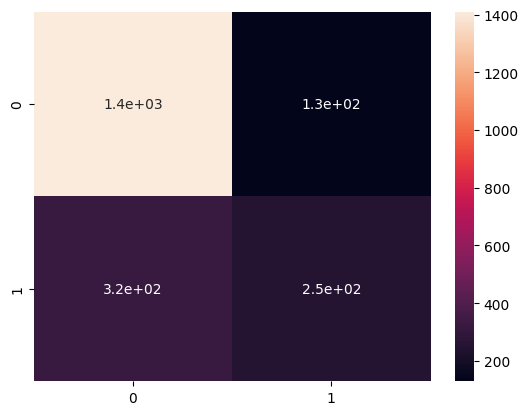

In [ ]:
# show confusion matrix
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True)

In [ ]:
from sklearn.svm import SVC

model = SVC()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.73      1.00      0.84      1539
           1       0.00      0.00      0.00       574

    accuracy                           0.73      2113
   macro avg       0.36      0.50      0.42      2113
weighted avg       0.53      0.73      0.61      2113



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Axes: >

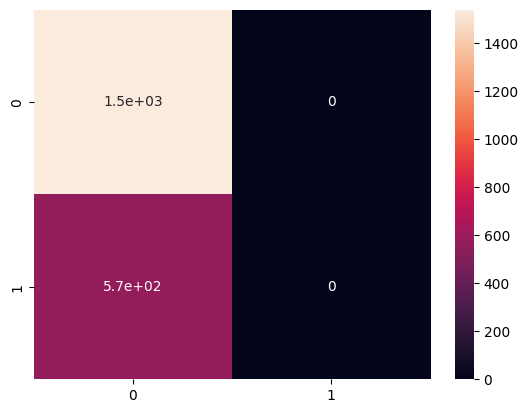

In [ ]:
# show confusion matrix
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.88      0.82      1539
           1       0.45      0.25      0.32       574

    accuracy                           0.71      2113
   macro avg       0.60      0.57      0.57      2113
weighted avg       0.67      0.71      0.68      2113



<Axes: >

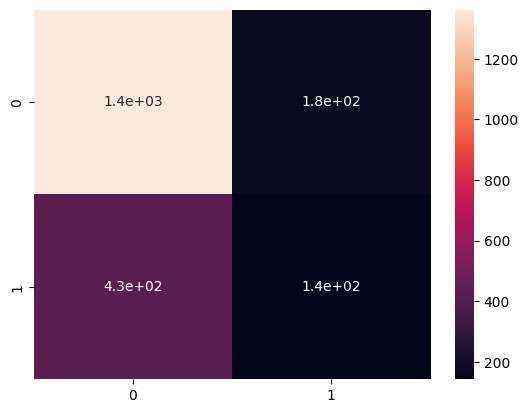

In [ ]:
# show confusion matrix
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True)

Dari hasil percobaan model klasifikasi machine learning dapat diambil kesimpulan bahwa hasil akurasi f1-score yang paling tinggi adalah menggunakan model klasifikasi Decission Tree, dengan akurasi 0.79.

Hasil akurasi masih dapat ditingkatkan dengan cara menormalisasikan data (min-max atau z-score) dan melakuan feature selection agar feature yang digunakan adalah feature yang memang berpengaruh.